In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading input file and shape identification
df = pd.read_csv('Life Expectancy Data.csv')
df.shape

(2938, 22)

In [3]:
#columns in input file
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
#sample data in input file
df.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1680,Mauritius,2002,Developing,71.5,179.0,0,4.14,369.631710,88.0,0,...,88.0,4.24,88.0,0.1,3957.51296,124621.0,7.9,7.9,0.683,12.5
1348,Kazakhstan,2013,Developing,69.5,28.0,5,6.48,26.407266,99.0,73,...,98.0,4.30,98.0,0.1,1389.85610,1735275.0,2.4,2.5,0.782,15.0
370,Brunei Darussalam,2013,Developing,77.1,84.0,0,0.01,2845.306444,98.0,0,...,99.0,2.61,99.0,0.1,44597.27968,NaN,5.8,5.2,0.860,14.9
2773,United Kingdom of Great Britain and Northern I...,2004,Developed,78.8,83.0,4,12.22,0.000000,NaN,189,...,92.0,7.98,92.0,0.1,NaN,NaN,0.7,0.5,NaN,NaN
1328,Japan,2001,Developed,81.5,72.0,4,8.03,5486.512080,NaN,22552,...,81.0,7.75,95.0,0.1,33846.46564,127149.0,1.7,1.4,0.856,14.6


In [5]:
#Null values check 
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
#country-wise mean imputation
countries_unique = df['Country'].unique()
cols_with_na = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ',
                'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
for col in cols_with_na:
    for country in countries_unique:
        df.loc[df['Country'] == country, col] = df.loc[df['Country'] == country, col].fillna(df[df['Country'] == country][col].mean())

In [7]:
#Null values check post mean imputation
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
#dropping null values and shape identification
df.dropna(inplace = True)
df.shape

(2128, 22)

In [9]:
df['Status'].value_counts()

Status
Developing    1824
Developed      304
Name: count, dtype: int64

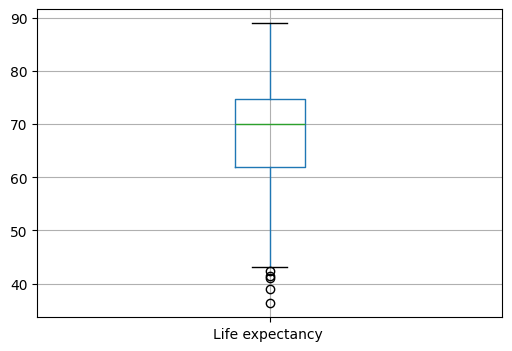

In [10]:
plt.figure(figsize = (6, 4))
df.boxplot('Life expectancy ')
plt.show()

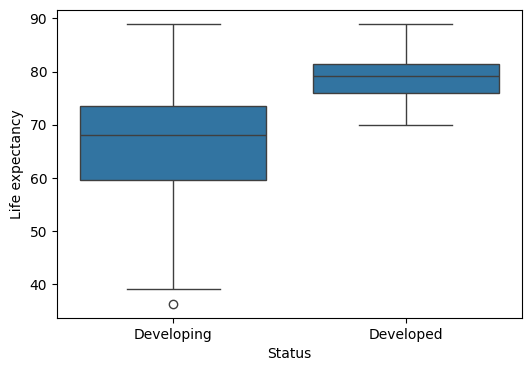

In [11]:
#EDA: boxplot for 'Life expectancy' column for both 'Developing' and 'Developed' countries
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'Status', y = 'Life expectancy ', data = df)
plt.xlabel('Status', fontsize = 10)
plt.ylabel('Life expectancy', fontsize = 10)
plt.show()

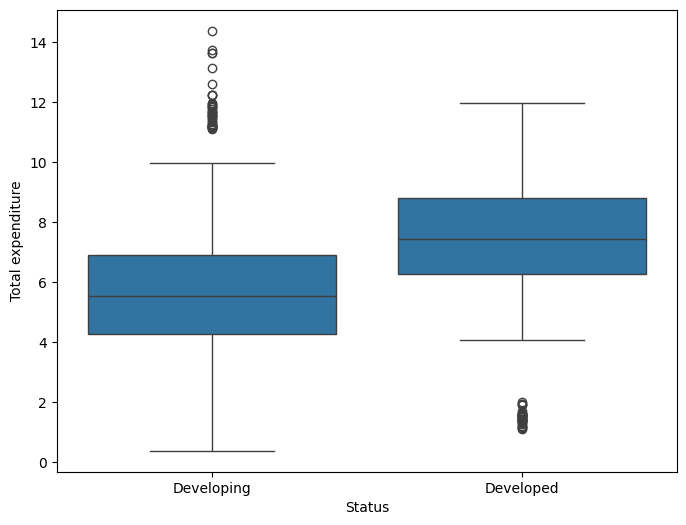

In [12]:
#EDA: boxplot for 'Total expenditure' column for both 'Developing' and 'Developed' countries
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Status', y = 'Total expenditure', data = df)
plt.xlabel('Status', fontsize = 10)
plt.ylabel('Total expenditure', fontsize = 10)
plt.show()

In [13]:
#EDA: correlation coefficients calculation for sample data
df_sample_corr = df[['Life expectancy ', 'Adult Mortality', 'Total expenditure', 'Population']].corr()
df_sample_corr

,Life expectancy,Adult Mortality,Total expenditure,Population
Life expectancy,1.000000,-0.662604,0.203689,-0.011420
Adult Mortality,-0.662604,1.000000,-0.097938,-0.021050
Total expenditure,0.203689,-0.097938,1.000000,-0.079752
Population,-0.011420,-0.021050,-0.079752,1.000000


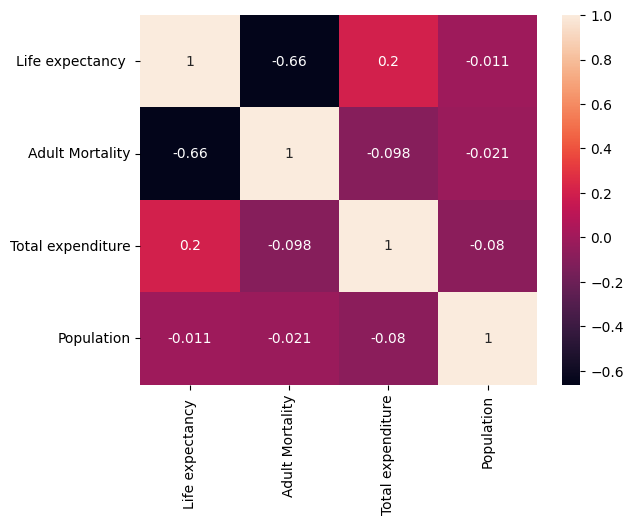

In [14]:
#EDA: heatmap for sample data
sns.heatmap(df_sample_corr, annot = True)
plt.show()

<Axes: xlabel='Schooling', ylabel='Count'>

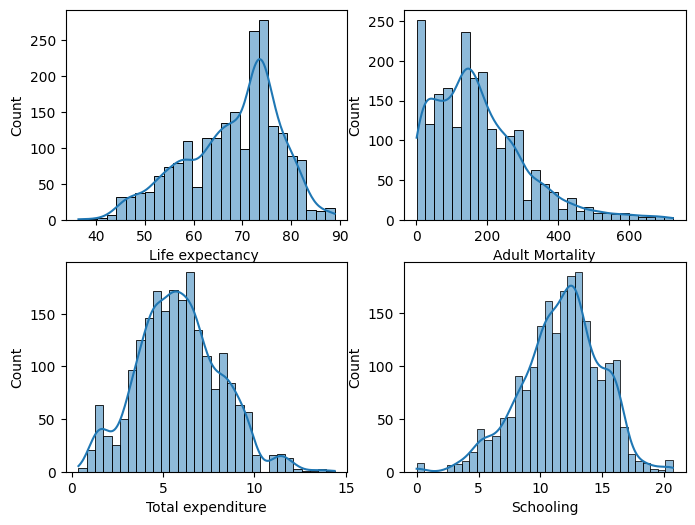

In [15]:
plt.figure(figsize = (8, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Life expectancy '], kde = 1)
plt.subplot(2, 2, 2)
sns.histplot(df['Adult Mortality'], kde = 1)
plt.subplot(2, 2, 3)
sns.histplot(df['Total expenditure'], kde = 1)
plt.subplot(2, 2, 4)
sns.histplot(df['Schooling'], kde = 1)

In [16]:
#extraction of feature and target variables
features = df.drop(columns = ['Life expectancy '], axis = 1)
target = df[['Life expectancy ']]

In [17]:
(features.shape), (target.shape)

((2128, 21), (2128, 1))

In [18]:
#dropping 'Country' column due to its insignificance
features.drop(columns = ['Country'], axis = 1, inplace = True)
features.shape

(2128, 20)

In [19]:
#extraction of categorical feature
categorical_features = features['Status'].copy()

In [20]:
#One-Hot Encoding for categorical variable and sample check
categorical_features = pd.get_dummies(categorical_features)
categorical_features.sample(10)

,Developed,Developing
1033,False,True
414,False,True
1595,False,True
2146,False,True
790,False,True
55,False,True
1883,False,True
2480,False,True
133,True,False
1451,True,False


In [21]:
#extraction of numerical features and sample check
numerical_features = features.drop(columns = ['Status'], axis = 1)
numerical_features.sample(5)

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
2584,2000,194.0,18,5.88,0.275648,95.0,4074,18.7,21,97.0,3.40,97.0,0.8,27.564826,6295821.0,9.4,9.7,0.640,10.9
795,2006,144.0,8,3.52,19.139833,96.0,0,47.9,9,92.0,5.86,96.0,0.3,335.786541,1396748.0,1.4,1.3,0.693,12.8
1064,2009,198.0,12,2.14,445.442337,92.0,0,46.5,15,92.0,6.79,92.0,0.4,2635.753474,1431628.0,1.3,1.3,0.596,10.4
857,2008,322.0,6,0.49,11.765723,94.0,0,15.1,9,94.0,3.69,94.0,1.1,326.825642,4232636.0,9.1,9.1,0.406,5.2


In [22]:
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,2.007500e+03,4.610856e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
Adult Mortality,2128.0,1.743003e+02,1.297593e+02,1.00000,76.000000,1.520000e+02,2.412500e+02,7.230000e+02
infant deaths,2128.0,3.590273e+01,1.362247e+02,0.00000,1.000000,4.000000e+00,2.400000e+01,1.800000e+03
Alcohol,2128.0,4.436893e+00,3.962858e+00,0.01000,0.827500,3.735000e+00,7.162500e+00,1.787000e+01
percentage expenditure,2128.0,6.400720e+02,1.710799e+03,0.00000,19.883256,8.367799e+01,4.313651e+02,1.896135e+04
Hepatitis B,2128.0,7.727206e+01,2.526004e+01,2.00000,68.000000,8.700000e+01,9.500000e+01,9.900000e+01
Measles,2128.0,2.657467e+03,1.191224e+04,0.00000,0.000000,2.000000e+01,4.592500e+02,2.121830e+05
BMI,2128.0,3.669196e+01,1.984373e+01,1.40000,18.400000,3.885000e+01,5.520000e+01,7.760000e+01
under-five deaths,2128.0,4.981720e+01,1.851527e+02,0.00000,1.000000,4.000000e+00,3.425000e+01,2.500000e+03
Polio,2128.0,8.057201e+01,2.417005e+01,3.00000,75.000000,9.100000e+01,9.600000e+01,9.900000e+01


In [23]:
from sklearn.preprocessing import StandardScaler
#Feature Engineering: Standardization (mean ~=0, std. dev. ~=1) of numerical features
standard_scaler = StandardScaler()
numerical_features = pd.DataFrame(standard_scaler.fit_transform(numerical_features),
                                columns = numerical_features.columns,
                                index = numerical_features.index)
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,0.000000e+00,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,-5.342427e-17,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,0.000000e+00,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,1.402387e-16,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,1.335607e-17,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,3.005115e-17,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,0.000000e+00,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,4.674623e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.669508e-17,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,8.347542e-17,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [24]:
(numerical_features.shape), (categorical_features.shape)

((2128, 19), (2128, 2))

In [25]:
#final feature set
final_features = pd.concat([numerical_features, categorical_features], axis = 1, sort = False)
final_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.626978,0.683732,0.191620,-1.117358,-0.332550,-0.485943,-0.126242,-0.886733,0.179261,-3.086031,...,-0.649601,-0.355934,-0.424250,0.322064,2.566866,2.523280,-0.631802,-0.497055,False,True
1,1.410048,0.745399,0.206305,-1.117358,-0.331238,-0.604736,-0.181828,-0.911936,0.195467,-0.934103,...,-0.773729,-0.355934,-0.421749,-0.207042,2.630549,2.564910,-0.646555,-0.528280,False,True
2,1.193118,0.722274,0.220990,-1.117358,-0.331416,-0.525541,-0.187034,-0.937139,0.211674,-0.768570,...,-0.690977,-0.355934,-0.420074,0.290313,2.673004,2.606539,-0.676060,-0.559506,False,True
3,0.976187,0.753107,0.243018,-1.117358,-0.328513,-0.406748,0.010876,-0.962342,0.233283,-0.561654,...,-0.566848,-0.355934,-0.416713,-0.153680,2.715459,2.668984,-0.710482,-0.590731,False,True
4,0.759257,0.776233,0.257703,-1.117358,-0.370075,-0.367151,0.029853,-0.982504,0.254892,-0.520270,...,-0.525472,-0.355934,-0.470041,-0.165057,2.779142,2.710614,-0.754739,-0.684408,False,True


In [26]:
(final_features.shape), (target.shape)

((2128, 21), (2128, 1))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 2)

In [28]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1702, 21), (1702, 1)), ((426, 21), (426, 1)))

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)

In [30]:
print('Coefficients - ML MLR Model: ', lin_reg.coef_)
print('Intercept - ML MLR Model: ', lin_reg.intercept_)

Coefficients - ML MLR Model:  [[ -0.31560576  -2.09924966  11.2099649   -0.6525324    0.26792832
   -0.14681565  -0.07884771   0.96921937 -11.27659382   0.56492408
    0.1652264    0.61289051  -2.68995827   0.39523595  -0.07362034
   -0.45925959   0.11251012   1.81745478   2.75246981   0.68383269
   -0.68383269]]
Intercept - ML MLR Model:  [68.60743327]


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE (ML MLR Model): ', mean_absolute_error(y_test, y_predict))
print('MSE (ML MLR Model): ', mean_squared_error(y_test, y_predict))
print('RMSE (ML MLR Model): ', np.sqrt(mean_squared_error(y_test, y_predict)))
print('R2-Score (ML MLR Model): ', r2_score(y_test, y_predict))
n = X_test.shape[0]
k = X_test.shape[1]
r2_scr = r2_score(y_test, y_predict)
adjusted_r2_score = 1 - (((1 - r2_scr) * (n - 1)) / (n - 1 -k))
print('Adjusted R2-Score (ML MLR Model): ', adjusted_r2_score)

MAE (ML MLR Model):  2.8611499279026313
MSE (ML MLR Model):  14.435371371323146
RMSE (ML MLR Model):  3.799390921098163
R2-Score (ML MLR Model):  0.8252058591025087
Adjusted R2-Score (ML MLR Model):  0.8161200250459559


In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
def neuralnet_model_sgd():
    model = keras.Sequential([layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'),
                              layers.Dense(16, activation = 'relu'),
                              layers.Dense(4, activation = 'relu'),
                              layers.Dense(1)])
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
    model.compile(loss = 'mse', metrics = ['mae', 'mse'], optimizer = optimizer)
    return model

In [34]:
model_sgd = neuralnet_model_sgd()
model_sgd.summary()

C:\Users\jebanerj\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,305 (5.10 KB)

 Trainable params: 1,305 (5.10 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
trained_model = model_sgd.fit(X_train, y_train, validation_split = 0.2, epochs = 500)
y_pred = model_sgd.predict(X_test)

Epoch 1/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3508.5293 - mae: 55.7777 - mse: 3508.5293 - val_loss: 1249.7179 - val_mae: 34.6174 - val_mse: 1249.7179
Epoch 2/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 327.9232 - mae: 13.9396 - mse: 327.9232 - val_loss: 21.7834 - val_mae: 3.5771 - val_mse: 21.7834
Epoch 3/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 42.5982 - mae: 5.0460 - mse: 42.5982 - val_loss: 18.1637 - val_mae: 3.3406 - val_mse: 18.1637
Epoch 4/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.0366 - mae: 4.0624 - mse: 25.0366 - val_loss: 14.0705 - val_mae: 2.8759 - val_mse: 14.0705
Epoch 5/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.1747 - mae: 2.8382 - mse: 14.1747 - val_loss: 28.9026 - val_mae: 4.2706 - val_mse: 28.9026
Epoch 6/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.3026 - mae: 2.8821 - mse: 14.3026 - val_loss: 29.2784 - val_mae: 4.3929 - val_mse: 29.2784
Epoch 7/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.9642 -

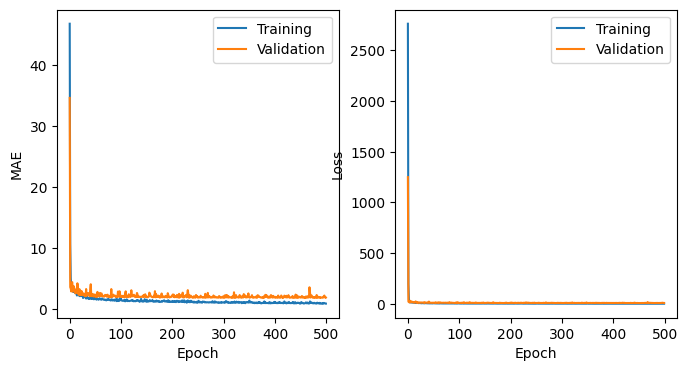

In [36]:
plt.figure(figsize = (8,4))
plt.subplot(1, 2, 1)
plt.plot(trained_model.history['mae'])
plt.plot(trained_model.history['val_mae'])
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.subplot(1, 2, 2)
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])

In [37]:
print('MAE (Sequentiual Model): ', mean_absolute_error(y_test, y_pred))
print('MSE (Sequentiual Model): ', mean_squared_error(y_test, y_pred))
print('RMSE (Sequentiual Model): ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2-Score (Sequentiual Model): ', r2_score(y_test, y_pred))
n = X_test.shape[0]
k = X_test.shape[1]
r2_scr = r2_score(y_test, y_pred)
adjusted_r2_score = 1 - (((1 - r2_scr) * (n - 1)) / (n - 1 -k))
print('Adjusted R2-Score (Sequentiual Model): ', adjusted_r2_score)

MAE (Sequentiual Model):  1.8200632333755493
MSE (Sequentiual Model):  7.52547550201416
RMSE (Sequentiual Model):  2.743260013563089
R2-Score (Sequentiual Model):  0.9088760018348694
Adjusted R2-Score (Sequentiual Model):  0.9041393583658899


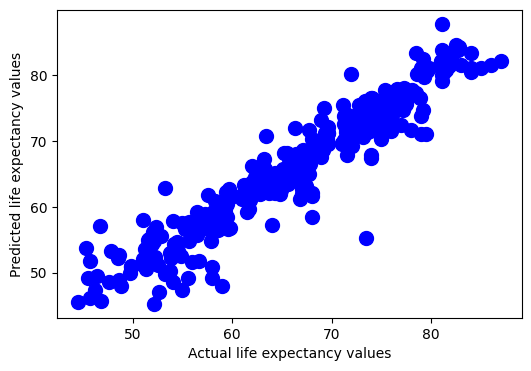

In [38]:
plt.figure(figsize = (6, 4))
plt.scatter(y_test, y_pred, s=100, c='blue')
plt.xlabel('Actual life expectancy values')
plt.ylabel('Predicted life expectancy values')
plt.show()